# Mount du drive

In [ ]:
# import des librairies nécessaires

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns

# Mount du drive où se situe le dataset
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

# PATH génétrique des fichiers 
path = "/content/drive/MyDrive/Accidents route/data/"


Mounted at /content/drive/


# Import dataset fusionné

In [ ]:
df = pd.read_csv(path + 'datasetf.csv', sep ='\t')
df.shape

<ipython-input-2-d0563984e7c9>:1: DtypeWarning: Columns (4,10,12,13,14,15,17,22,23,27,28,48,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + 'datasetf.csv', sep ='\t')


(497594, 57)

In [ ]:
df.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,locp,actp,etatp,an_nais,vma,id_vehicule,motor,secu1,secu2,secu3
0,201800000001,18,1,24,1505,1,1,4,1.0,1.0,...,0.0,0.0,0.0,1928.0,NaN,NaN,NaN,NaN,NaN,NaN
1,201800000001,18,1,24,1505,1,1,4,1.0,1.0,...,0.0,0.0,0.0,1960.0,NaN,NaN,NaN,NaN,NaN,NaN
2,201800000002,18,2,12,1015,1,2,7,7.0,7.0,...,0.0,0.0,0.0,1947.0,NaN,NaN,NaN,NaN,NaN,NaN
3,201800000002,18,2,12,1015,1,2,7,7.0,7.0,...,2.0,3.0,1.0,1959.0,NaN,NaN,NaN,NaN,NaN,NaN
4,201800000003,18,3,4,1135,1,2,3,1.0,7.0,...,0.0,0.0,0.0,1987.0,NaN,NaN,NaN,NaN,NaN,NaN


# Analyse des données USAGERS

In [ ]:
df_usagers = df[['Num_Acc','num_veh','an_nais','place','catu','sexe','trajet','secu','secu1','secu2','secu3','locp','actp','etatp', 'grav', 'id_vehicule'
]].copy()   # je travaille sur une copie non liée au df original
df_usagers.shape

(497594, 16)

In [ ]:
df_usagers.head()

,Num_Acc,num_veh,an_nais,place,catu,sexe,trajet,secu,secu1,secu2,secu3,locp,actp,etatp,grav,id_vehicule
0,201800000001,B01,1928.0,1.0,1,1,0.0,11.0,NaN,NaN,NaN,0.0,0.0,0.0,3,NaN
1,201800000001,A01,1960.0,1.0,1,1,5.0,11.0,NaN,NaN,NaN,0.0,0.0,0.0,1,NaN
2,201800000002,A01,1947.0,1.0,1,1,0.0,11.0,NaN,NaN,NaN,0.0,0.0,0.0,1,NaN
3,201800000002,A01,1959.0,NaN,3,1,0.0,2.0,NaN,NaN,NaN,2.0,3.0,1.0,4,NaN
4,201800000003,A01,1987.0,1.0,1,1,5.0,21.0,NaN,NaN,NaN,0.0,0.0,0.0,3,NaN



Le dataset comporte 16 colonnes au total 

A noter qu'il y a eu un changement dans la structure des données pour la variable secu à partir de 2019 : de secu a secu1/secu2/secu3

# Description des variables

grav : 1 Indemne / 2 Tué/ 3 Blessé hospitalisé /4 – Blessé léger 

num_acc : numérique

id_vehicule : numérique

num_vehicule : numérique

an_naiss : numérique

place : 1 conducteur / 2 avant droite / 3 arrière droit / 4 arrière gauche / 5 arrière milieu / 6 devant milieu / 7 milieu gauche / 8 milieu milieu / 9 milieu droit / 10 piéton

catu : 1 conducteur / 2 passager / 3 piéton

sexe : 1 masculin / 2 Féminin

trajet : -1 et 0 Non renseigné / 1 Domicile – travail / 2 Domicile – école
3 Courses – achats / 4 Utilisation professionnelle / 5 Promenade – loisirs / 9 Autre

secu1/secu2/secu3 : -1 – Non renseigné /
0 – Aucun équipement /
1 – Ceinture /
2 – Casque / 
3 – Dispositif enfants /
4 – Gilet réfléchissant /
5 – Airbag (2RM/3RM) /
6 – Gants (2RM/3RM) /
7 – Gants + Airbag (2RM/3RM) /
8 – Non déterminable /
9 – Autre 

locp : -1 – Non renseigné /
0 – Sans objet /
Sur chaussée :
1 – A + 50 m du passage piéton /
2 – A – 50 m du passage piéton /
Sur passage piéton :
3 – Sans signalisation lumineuse /
4 – Avec signalisation lumineuse /
Divers :
5 – Sur trottoir /
6 – Sur accotement /
7 – Sur refuge ou BAU /
8 – Sur contre allée /
9 – Inconnue 

actp : 
-1 – Non renseigné /
Se déplaçant
0 – Non renseigné ou sans objet /
1 – Sens véhicule heurtant /
2 – Sens inverse du véhicule /
Divers
3 – Traversant /
4 – Masqué /
5 – Jouant – courant /
6 – Avec animal /
9 – Autre /
A – Monte/descend du véhicule /
B – Inconnue

etatp : -1 – Non renseigné / 1 – Seul / 2 – Accompagné / 3 – En groupe

# Analyse variable "grav" : variable cible

*Type de la variable :* grav est la variable cible du dataset

*Description de la variable :* grav représente la gravité de blessure de l'usager.

*Disponibilité de la variable : Pouvez vous connaitre ce champ en amont d'une prédiction ? Aurez vous accès à cette variable en environnement de production ?*
Variable non disponible en prédiction


*Type informatique de la variable :* variable catégorielle mais encodée numériquement comme suit :

1 – Indemne

2 – Tué

3 – Blessé hospitalisé

4 – Blessé léger 

=> Elle est de type informatique numérique

In [ ]:
target = df_usagers['grav']
target.dtypes

dtype('int64')

*Taux de Na :*

In [ ]:
target.isna().sum()

0

In [ ]:
target.value_counts()

 1    207937
 4    197821
 3     78887
 2     12889
-1        60
Name: grav, dtype: int64

La variable ne contient aucun NA.
Mais elle contient des valeurs -1 qui ne correspondent à aucune valeur de la documentation. Il faut donc les considérer comme des Nan.

Pour plus de facilité après, les valeurs -1 sont remplacées par des Nan

In [ ]:
target=target.replace(-1, np.nan)
target.value_counts(dropna=False)

1.0    207937
4.0    197821
3.0     78887
2.0     12889
NaN        60
Name: grav, dtype: int64

*Distribution de la valeur :* catégorielle

4 valeurs possibles + valeur Nan
 


*Relation entre la valeur :*

pas de notion d'ordre telle que défini dans la documentation car tué quie st le plus grave a le n°2


*Equilibre :*

Variable déséquilibrée car 80% des valeurs sont 1 ou 2


<Axes: >

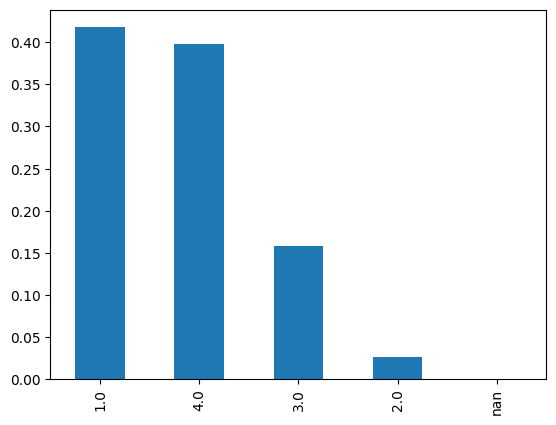

In [ ]:
target.value_counts(dropna=False, normalize=True).plot(kind='bar')

*Regroupement de valeurs : 
Pensez vous modifier ou regrouper ou découper les valeurs ? si oui détaillez votre démarche*

Non pour le moment non

*Pertinence métier 
Selon vous, ou l'avis d'experts que vous avez consulté, la variable vous semble-t-elle pertinente pour expliquer la variable cible. Si oui, détaillez pourquoi.*


variable cible

*Fiabilité méthode acquisition : Connaissez vous la façon dont a été acquise la données. Avez vous confiance dans les champs renseingés ? Si non, détaillez pourquoi*


à compléter



*Dépendance avec d'autres variables*

cf en dessous

# Analyse des variables descriptives

## Type des variables

Toutes les autres variables sont des variables explicatives

## Description des variables

ref : https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2021/20221104-163105/description-des-bases-de-donnees-annuelles-2021.pdf

**Rubrique USAGERS**

**Num_Acc** : Identifiant de l’accident identique à celui du fichier "rubrique CARACTERISTIQUES" repris pour chacun des usagers décrits impliqués dans l’accident.

**id_vehicule** : Identifiant unique du véhicule repris pour chacun des usagers occupant ce véhicule (y compris les piétons qui sont rattachés aux véhicules qui les ont heurtés)

**num_Veh** : Identifiant du véhicule repris pour chacun des usagers occupant ce véhicule (y compris les piétons qui sont rattachés aux véhicules qui les ont heurtés) 

**place** : Permet de situer la place occupée dans le véhicule par l'usager au moment de l'accident. 

**catu** : Catégorie d'usager.

**sexe** : sexe de l'usager.

**An_nais** : Année de naissance de l'usager.

**trajet** : Motif du déplacement au moment de l’accident 

---
Attention : Les équipements de sécurité jusqu’en 2018 étaient en 2 variables : existence et utilisation (type binaire oui /non). 

A partir de 2019, il s’agit de l’utilisation avec jusqu’à 3 équipements possibles pour un même usager (notamment pour les motocyclistes dont le port du casque et des gants est obligatoire).

---
**secu ou secu1/secu2/secu3** : 3 équipements

**locp** : Localisation du piéton

**actp** : Action du piéton

**etatp** : Cette variable permet de préciser si le piéton accidenté était seul ou non

## Disponibilité des variables

*Pouvez vous connaitre ce champ en amont d'une prédiction ? Aurez vous accès à cette variable en environnement de production ?*

Variables disponible en production

## Type informatique des variables

In [ ]:
for i in df_usagers :
  print("Type de la variable ", i,  "  ", df_usagers[i].dtypes)

Type de la variable  Num_Acc    int64
Type de la variable  num_veh    object
Type de la variable  an_nais    float64
Type de la variable  place    float64
Type de la variable  catu    int64
Type de la variable  sexe    int64
Type de la variable  trajet    float64
Type de la variable  secu    float64
Type de la variable  secu1    float64
Type de la variable  secu2    float64
Type de la variable  secu3    float64
Type de la variable  locp    float64
Type de la variable  actp    object
Type de la variable  etatp    float64
Type de la variable  grav    int64
Type de la variable  id_vehicule    object


Il y a 3 variables de type object (qualitatives)
Les autres variables sont des variables de type int (quantitatives)

Mais en réalité seule la variable num_acc est une variable quantitative, les autres variables numérique ssont des variables catégorielles encodées avec des chiffres

## Identification des Nan et vérification des valeurs des variables

In [ ]:
for i in df_usagers :
  print("Taux NaN variable ", i,  "  ", df_usagers[i].isna().sum() /df_usagers.shape[0]*100, "%")

Taux NaN variable  Num_Acc    0.0 %
Taux NaN variable  num_veh    0.0 %
Taux NaN variable  an_nais    0.6223949645695085 %
Taux NaN variable  place    2.202598905935361 %
Taux NaN variable  catu    0.0 %
Taux NaN variable  sexe    0.0 %
Taux NaN variable  trajet    0.022910244094583136 %
Taux NaN variable  secu    74.67011258174335 %
Taux NaN variable  secu1    26.159680381998175 %
Taux NaN variable  secu2    26.159680381998175 %
Taux NaN variable  secu3    26.159680381998175 %
Taux NaN variable  locp    10.983050438711079 %
Taux NaN variable  actp    10.98204560344377 %
Taux NaN variable  etatp    10.98204560344377 %
Taux NaN variable  grav    0.0 %
Taux NaN variable  id_vehicule    26.159680381998175 %


Les variables Num_Acc, catu, sexe, num_vehicule ne contiennent pas de NaN.
Les variables place, trajet, locp, actp, etatp, an_nais ont certaines valeurs Nan <10%.

Certaines variables ont des valeurs -1 qui n'est pas prévu dans la documentation.

Certaines variables comportent des NaN car la structure des donées à changer en 2019. 

La variables id_vehicule comporte 42% de Nan car cette variable n'est présente qu'à partir de 2019. Elle est redondante avec num_vehicule et peut être supprimée.

Les variables secu, secu1/secu2/secu3 ont 42% de Nan car il y a un changement d'organisation de cette variable à partir de 2019. Il faudra traiter et peut être fusionner ces variables. 

In [ ]:
print(df_usagers['place'].value_counts(dropna=False, ascending=False))
# place comporte des -1 non prévues dans la documentation

 1.0     368140
 2.0      56418
 10.0     28982
 NaN      10960
 3.0       9459
 4.0       8365
 9.0       5199
 7.0       4721
 5.0       2506
 8.0       2190
 6.0        637
-1.0         17
Name: place, dtype: int64


In [ ]:
print(df_usagers['catu'].value_counts(dropna=False, ascending=False))
# catu comporte des 4 non prévues dans la documentation

1    368830
2     88822
3     39942
Name: catu, dtype: int64


In [ ]:
print(df_usagers['sexe'].value_counts(dropna=False, ascending=False))

# sexe comporte des -1 non prévues dans la documentation

 1    337256
 2    157276
-1      3062
Name: sexe, dtype: int64


In [ ]:
print(df_usagers['trajet'].value_counts(dropna=False, ascending=False))

# trajet est cohérent avec les valeurs de la documentation et comporte des Nan

 5.0    188406
 0.0    122060
 1.0     67510
 4.0     47184
 9.0     41330
 3.0     16101
 2.0     10863
-1.0      4026
 NaN       114
Name: trajet, dtype: int64


In [ ]:
print(df_usagers['locp'].value_counts(dropna=False, ascending=False))

# locp est cohérent avec les valeurs de la documentation et comporte des Nan

 0.0    238884
-1.0    165644
 NaN     54651
 3.0     11931
 2.0      8923
 4.0      6022
 1.0      5599
 5.0      2872
 9.0      1367
 6.0      1091
 8.0       563
 7.0        47
Name: locp, dtype: int64


In [ ]:
print(df_usagers['actp'].value_counts(dropna=False, ascending=False))

# actp est cohérent avec les valeurs de la documentation et comporte des Nan
# certaines valeurs sont redondantes : pb de type ?

0      202904
 -1    136046
0.0     58011
NaN     54646
3       20923
0.0      7209
3.0      6613
9        1879
1        1834
3.0      1315
5        1183
B         931
2         828
9.0       651
1.0       527
4         411
5.0       338
A         324
2.0       256
5.0       146
4.0       118
9.0       109
1.0       102
6          83
4.0        63
8          40
7          39
2.0        37
6.0        28
Name: actp, dtype: int64


In [ ]:
print(df_usagers['etatp'].value_counts(dropna=False, ascending=False))

# etatp comporte des 0 non prévues dans la documentation

-1.0    339004
 0.0     65020
 NaN     54646
 1.0     29492
 2.0      7822
 3.0      1610
Name: etatp, dtype: int64


In [ ]:
df_usagers['an_nais'].value_counts(dropna=False)

# Pas de NaN

2000.0    13996
1999.0    13986
1998.0    13607
1997.0    12933
1996.0    12727
          ...  
1910.0        3
1916.0        2
1911.0        2
1917.0        1
1912.0        1
Name: an_nais, Length: 112, dtype: int64

In [ ]:
df_usagers['num_veh'].value_counts(dropna=False, ascending=False)

# pas de NaN

A01     300324
B01     166772
C01      19643
D01       4292
Z01       4044
         ...  
\01          1
LB01         1
Z02          1
C02          1
]01          1
Name: num_veh, Length: 75, dtype: int64

In [ ]:
df_usagers['secu'].value_counts(dropna=False, ascending=False)

NaN     371554
11.0     77566
21.0     24118
3.0       7543
13.0      6703
2.0       2399
23.0      1574
12.0      1553
93.0      1370
31.0      1033
22.0       937
91.0       477
92.0       380
41.0       120
42.0       106
43.0       100
33.0        27
1.0         23
32.0        11
Name: secu, dtype: int64

In [ ]:
df_usagers['secu1'].value_counts(dropna=False, ascending=False)

# secu1 est cohérent avec les valeurs de la documentation et comporte des Nan


 1.0    218344
 NaN    130169
 2.0     68650
 8.0     44988
 0.0     28989
-1.0      2912
 3.0      2384
 9.0       420
 6.0       302
 4.0       232
 5.0       194
 7.0        10
Name: secu1, dtype: int64

In [ ]:
df_usagers['secu2'].value_counts(dropna=False, ascending=False)

# secu2 est cohérent avec les valeurs de la documentation et comporte des Nan


 0.0    146876
-1.0    134830
 NaN    130169
 8.0     41228
 6.0     33212
 5.0      4560
 4.0      3363
 9.0      1059
 2.0       739
 1.0       670
 7.0       505
 3.0       383
Name: secu2, dtype: int64

In [ ]:
# Recherche de valeurs non prévues 
df_usagers['secu3'].value_counts(dropna=False, ascending=False)

# secu2 est cohérent avec les valeurs de la documentation et comporte des Nan


-1.0    363199
 NaN    130169
 9.0      2659
 0.0      1102
 6.0       190
 8.0       164
 4.0        51
 1.0        21
 5.0        19
 7.0         8
 2.0         7
 3.0         5
Name: secu3, dtype: int64

## Distribution des valeurs

Num_Acc : numérique

id_vehicule : numérique

num_Veh : numérique

place : catégorielle (10 catégories)

catu : catégorielle (3 catégories)

sexe : catégorielle (2 catégories)

An_nais : numérique

trajet : catégorielle (10 catégories)

secu : catégorielle (2 catégories)
secu1/secu2/secu3 : catégorielle (10 catégories)

locp : catégorielle (2 catégories)

actp : catégorielle (10 catégories)

etatp : catégorielle (4 catégories)

Etendue des valeurs : cf documentation 
https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2021/20221104-163105/description-des-bases-de-donnees-annuelles-2021.pdf

## Relation entre les valeurs

Toutes les variables descriptives sont cardinales, 
il n'y a de notion d'ordre dans les valeurs

## Equilibre des variables

*Quelle est la répartition des valeurs ? La répartition vous semble-t-ellle équilibrée ou trop focalisée autour d'une valeur*

In [ ]:
# pour les variables statistiques

for i in df_usagers : 
 print(i)
 print(df_usagers[i].value_counts(normalize=True))

Num_Acc
201800017680    0.000102
201800019383    0.000092
201800013008    0.000088
201800029284    0.000078
201800006589    0.000076
                  ...   
201800034763    0.000002
201900037942    0.000002
201800034760    0.000002
201800034759    0.000002
201900001250    0.000002
Name: Num_Acc, Length: 220885, dtype: float64
num_veh
A01     0.603552
B01     0.335157
C01     0.039476
D01     0.008626
Z01     0.008127
          ...   
\01     0.000002
LB01    0.000002
Z02     0.000002
C02     0.000002
]01     0.000002
Name: num_veh, Length: 75, dtype: float64
an_nais
2000.0    0.028304
1999.0    0.028283
1998.0    0.027517
1997.0    0.026154
1996.0    0.025737
            ...   
1910.0    0.000006
1916.0    0.000004
1911.0    0.000004
1917.0    0.000002
1912.0    0.000002
Name: an_nais, Length: 111, dtype: float64
place
 1.0     0.756503
 2.0     0.115935
 10.0    0.059556
 3.0     0.019438
 4.0     0.017190
 9.0     0.010684
 7.0     0.009701
 5.0     0.005150
 8.0     0.004500
 6.0  

Num_acc, num_vehicul, id_vehicule : variables id de liaison

an_nais : équilibrée

place : déséquilibré (76% valeur 1)

catu : déséquilibré (74% valeur 1)

sexe : plutôt équilibrée (68% valeur 1)

locp : déséquilibré (62% valeur 0)

actp : déséquilibré (60% valeur 0)

trajet : déséquilibrée (60% valeur 11)

etap : déséquilibré  (58% valeur -1, 80% valeurs -1 ou 0)

secu : déséquilibré  (60% valeur 11)

secu1 : déséquilibré (60% valeur 1)

secu2 : assez deséquilibrée (40% valeur 0, 36% valeur 1..)

secu3 : trés déséquilibré (98% valeur -1)

## Regroupement de valeurs

*Pensez vous modifier ou regrouper ou découper les valeurs ? si oui détaillez votre démarche*

Traitement des valeurs pour la variable actp : il faut changer les valeurs 0.0, 1.0, 2.0,... par 0, 1, 2

Traitement /fusion des variables secu et secu1, secu2, secu3

Ces deux sujets sont traitées dans la partie "Traitement des données"

## Pertinence métier des variables


*Selon vous, ou l'avis d'experts que vous avez consulté, la variable vous semble-t-elle pertinente pour expliquer la variable cible. Si oui, détaillez*

Aucune variable n'est corrélée à la variable cible mais chaque variabble descriptive est pertinente pour expliquer la variable cible,
sauf les variables id* et num* qui servent à faire le lien avec les autres fichiers du dataset et qui pourront être supprimées après la fusion de l'ensemble des fichiers.


## Fiabilité de la méthode d'acquisition

*Connaissez vous la façon dont a été acquise la données. Avez vous confiance dans les champs renseingés ? Si non, détaillez pourquoi*

décrit dans la documentation : https://static.data.gouv.fr/resources/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2021/20221104-163105/description-des-bases-de-donnees-annuelles-2021.pdf

# Traitements des données

## Traitement variable actp (pb type valeurs)

La variables possédent des int (1.0, 2.0....) et des char ('1', '2'...).
ainsi que deux valeurs 'A' et 'B' 

Traitement #1 : transformation de toutes les valeurs en int

In [ ]:
print(df_usagers['actp'].value_counts(dropna=False))

df_usagers['actp']=df_usagers['actp'].replace('B', '11')
df_usagers['actp']=df_usagers['actp'].replace('A', '10')
df_usagers['actp']= df_usagers['actp'].replace('0', 0)
df_usagers['actp']= df_usagers['actp'].replace('0.0', 0)
df_usagers['actp']= df_usagers['actp'].replace(0.0, 0)
df_usagers['actp']= df_usagers['actp'].replace('1', 1)
df_usagers['actp']= df_usagers['actp'].replace('1.0', 3)
df_usagers['actp']= df_usagers['actp'].replace(1.0, 1)
df_usagers['actp']= df_usagers['actp'].replace('2', 2)
df_usagers['actp']= df_usagers['actp'].replace('2.0', 3)
df_usagers['actp']= df_usagers['actp'].replace(2.0, 2)
df_usagers['actp']= df_usagers['actp'].replace('3', 3)
df_usagers['actp']= df_usagers['actp'].replace('3.0', 3)
df_usagers['actp']= df_usagers['actp'].replace(3.0, 3)
df_usagers['actp']= df_usagers['actp'].replace('4.0', 3)
df_usagers['actp']= df_usagers['actp'].replace('4', 4)
df_usagers['actp']= df_usagers['actp'].replace(4.0, 4)
df_usagers['actp']= df_usagers['actp'].replace('5.0', 3)
df_usagers['actp']= df_usagers['actp'].replace('5', 5)
df_usagers['actp']= df_usagers['actp'].replace(5.0, 5)
df_usagers['actp']= df_usagers['actp'].replace('6.0', 3)
df_usagers['actp']= df_usagers['actp'].replace('6', 6)
df_usagers['actp']= df_usagers['actp'].replace(6.0, 6)
df_usagers['actp']= df_usagers['actp'].replace('7.0', 3)
df_usagers['actp']= df_usagers['actp'].replace('7', 7)
df_usagers['actp']= df_usagers['actp'].replace(7.0, 7)
df_usagers['actp']= df_usagers['actp'].replace('8.0', 3)
df_usagers['actp']= df_usagers['actp'].replace('8', 8)
df_usagers['actp']= df_usagers['actp'].replace(8.0, 8)
df_usagers['actp']= df_usagers['actp'].replace('9.0', 3)
df_usagers['actp']= df_usagers['actp'].replace('9', 9)
df_usagers['actp']= df_usagers['actp'].replace(9.0, 9)
df_usagers['actp']= df_usagers['actp'].replace('10.0', 3)
df_usagers['actp']= df_usagers['actp'].replace('10', 10)
df_usagers['actp']= df_usagers['actp'].replace(10.0, 10)


print(df_usagers['actp'].value_counts(dropna=False))


0      268124
-1     190692
3       29206
9        2530
1        2361
5        1521
2        1084
11        931
4         529
10        324
6         111
1.0       102
8          40
7          39
Name: actp, dtype: int64
0     268124
-1    190692
3      29308
9       2530
1       2361
5       1521
2       1084
11       931
4        529
10       324
6        111
8         40
7         39
Name: actp, dtype: int64


In [ ]:
# replacement des Nan et ' -1' par -1 pour pouvoir changer  le type de colonne en int

print(df_usagers['actp'].dtype)
df_usagers['actp'] = df_usagers['actp'].replace(np.NaN, -1)
df_usagers['actp'] = df_usagers['actp'].replace(' -1' ,-1)

df_usagers['actp'] = df_usagers['actp'].astype(np.int64)
print(df_usagers['actp'].dtype)

object
int64


## Traitement id_vehicule / num_vehicule

Variables redondantes et id_vehicule n'est présente que depuis 2019


=> question : je la supprimerais ?

## Traitement variables secu (2017-2018) et secu1,2,3 (2019-2021)

secu : 
sur 2 caractères :

le premier concerne l’existence d’un Équipement de sécurité
1 – Ceinture
2 – Casque
3 – Dispositif enfants
4 – Equipement réfléchissant
9 – Autre

le second concerne l’utilisation de l’Équipement de sécurité
1 – Oui
2 – Non
3 – Non déterminable

11 dans secu doit devenir 1 dans secu1

21 dans secu doit devenir 2 dans secu1

31 dans secu doit devenir 3 dans secu1

41 dans secu doit devenir 4 dans secu1

91 dans secu doit devenir 9 dans secu1


In [1]:
ind= df_usagers.index[(df_usagers['secu'] == 11.0)].tolist()
df_usagers.loc[ind, 'secu1'] = 1.0

ind= df_usagers.index[(df['secu'] == 21.0)].tolist()
df_usagers.loc[ind, 'secu1'] = 2.0

ind= df_usagers.index[(df_usagers['secu'] == 31.0)].tolist()
df_usagers.loc[ind, 'secu1'] = 3.0

ind= df_usagers.index[(df_usagers['secu'] == 41.0)].tolist()
df_usagers.loc[ind, 'secu1'] = 4.0

ind= df_usagers.index[(df_usagers['secu'] == 91.0)].tolist()
df_usagers.loc[ind, 'secu1'] = 9.0

df_usagers['secu1'].value_counts(dropna=False)

NameError: ignored

In [ ]:
# suppression d la colonne secu devenue inutile 

df_usagers = df_usagers.drop('secu', axis=1)

## Remplacement des valeurs en Nan (-1, 0, 4) 

tous les -1 correspondent à des Nan 
 
etatp comporte des 0 non prévues dans la documentation 

catu comporte des 4 non prévues dans la documentation

trajet comporte des 0 signifie Non renseigné

In [ ]:
# remplacement des -1 par Nan

print(df_usagers.isna().sum())
df_usagers = df_usagers.replace(-1, np.nan)
print(df_usagers.isna().sum())

Num_Acc             0
num_veh             0
an_nais          3097
place           10977
catu                0
sexe             3062
trajet           4140
secu1           29767
secu2          264999
secu3          493368
locp           220295
actp           190692
etatp          393650
grav               60
id_vehicule    130169
dtype: int64
Num_Acc             0
num_veh             0
an_nais          3097
place           10977
catu                0
sexe             3062
trajet           4140
secu1           29767
secu2          264999
secu3          493368
locp           220295
actp           190692
etatp          393650
grav               60
id_vehicule    130169
dtype: int64


In [ ]:
# remplacement dans etatp des 0 par des Nan 

print(df_usagers['etatp'].value_counts(dropna= False))
df_usagers['etatp'] = df_usagers['etatp'].replace(0, np.nan)
print(df_usagers['etatp'].value_counts(dropna= False))

NaN    393650
0.0     65020
1.0     29492
2.0      7822
3.0      1610
Name: etatp, dtype: int64
NaN    458670
1.0     29492
2.0      7822
3.0      1610
Name: etatp, dtype: int64


In [ ]:
# remplacement dans catu des 4 par des Nan 

print(df_usagers['catu'].value_counts(dropna= False))
df_usagers['catu'] = df_usagers['catu'].replace(4, np.nan)
print(df_usagers['catu'].value_counts(dropna= False))

1    368830
2     88822
3     39942
Name: catu, dtype: int64
1    368830
2     88822
3     39942
Name: catu, dtype: int64


In [ ]:
# remplacement dans trajet des 0 par des Nan 

print(df_usagers['trajet'].value_counts(dropna= False))
df_usagers['trajet'] = df_usagers['trajet'].replace(4, np.nan)
print(df_usagers['trajet'].value_counts(dropna= False))

5.0    188406
0.0    122060
1.0     67510
4.0     47184
9.0     41330
3.0     16101
2.0     10863
NaN      4140
Name: trajet, dtype: int64
5.0    188406
0.0    122060
1.0     67510
NaN     51324
9.0     41330
3.0     16101
2.0     10863
Name: trajet, dtype: int64


## Traitements des Nan

<Axes: >

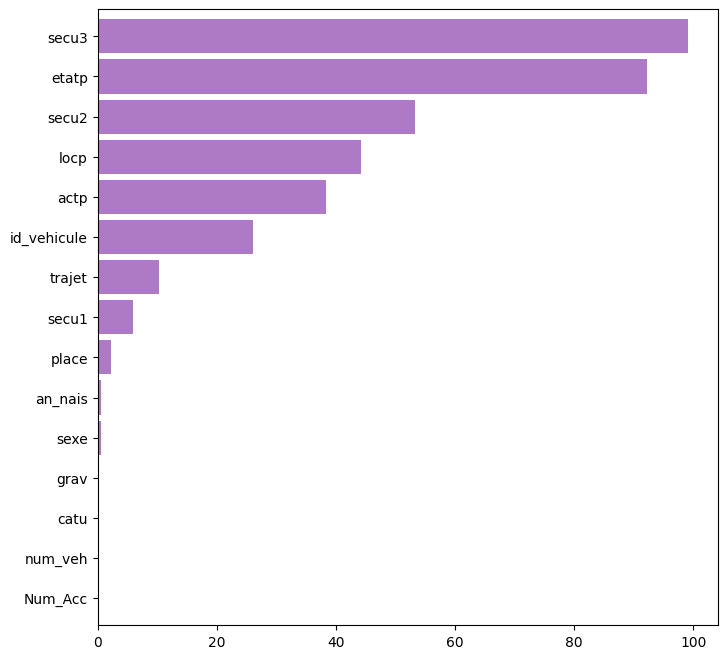

In [ ]:
# Graphique Nan

nan_values = df_usagers.isna().sum()

nan_values = nan_values.sort_values(ascending=True)*100/df_usagers.shape[0]
nan_values.plot(kind='barh', 
                     figsize=(8, 8), 
                     color='#AF7AC5',
                     zorder=2,
                     width=0.85)

In [ ]:
# suppression des variables avec >20% de Nan 


In [ ]:
# remplacement des Nan par autre valeurs 


# Corrélation entre les variables

<ipython-input-56-e95590bd45e5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_usagers.corr(method='pearson')


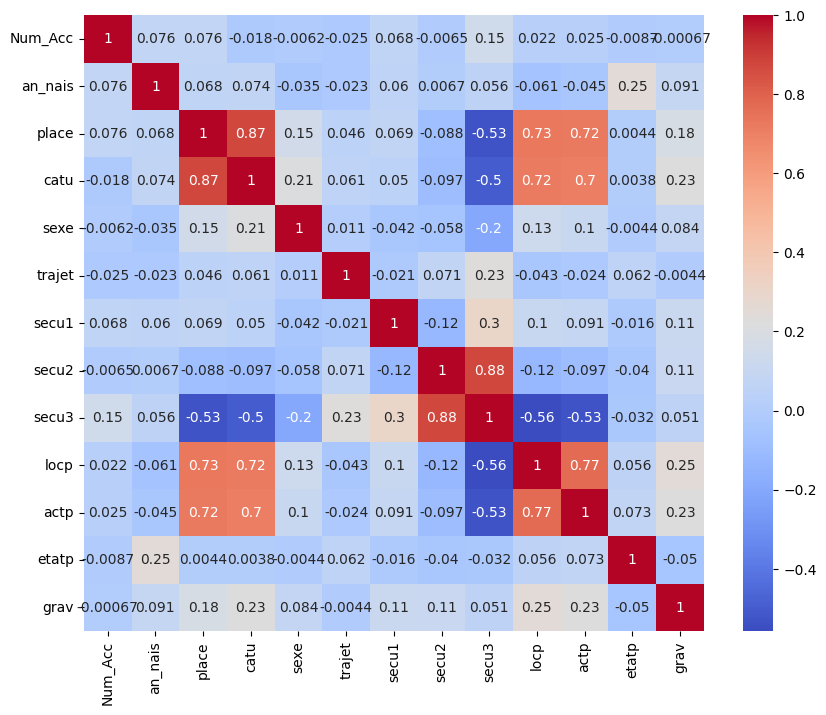

In [ ]:
# Calculer la corrélation entre toutes les colonnes
corr_matrix = df_usagers.corr(method='pearson')

# Créer la heatmap de corrélation
plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Afficher la heatmap
plt.show()


La variable cible grav n'est corrélé à aucune variable descriptives 

Les variables catu et place sont très fortement corrélées 

Les variables secu3 et secu2 sont forteent corrélées

Les variables locp et actp sont fortement corrélées

Les variables place et locp sont corrélées

Les variables placeet actp

Les variables place et secu3 sont corrélées négativement 

Les variables catu et secu3 sont corrélées négativement 

Les variables locp et secu3 sont corrélées négativement 

Les variables actp et secu3 sont corrélées négativement 


In [ ]:
# test CHI2

from scipy.stats import chi2_contingency

df_place= pd.crosstab(.place, df_usagers.grav)
df_catu = pd.crosstab(df_usagers.catu, df_usagers.grav)
df_sexe = pd.crosstab(df_usagers.sexe, df_usagers.grav)
df_trajet= pd.crosstab(df_usagers.trajet, df_usagers.grav)
df_secu1 = pd.crosstab(df_usagers.secu1, df_usagers.grav)
df_secu2 = pd.crosstab(df_usagers.secu2, df_usagers.grav)
df_secu3 = pd.crosstab(df_usagers.secu3, df_usagers.grav)
df_locp= pd.crosstab(df_usagers.locp, df_usagers.grav)
df_actp= pd.crosstab(df_usagers.actp, df_usagers.grav)
df_etatp= pd.crosstab(df_usagers.etatp, df_usagers.grav)


In [ ]:
# Test du chi2 pour chaque variable

place_chi2, place_p, place_dof, place_expected = chi2_contingency(df_place)
catu_chi2, catu_p, catu_dof, catu_expected = chi2_contingency(df_catu)
sexe_chi2, sexe_p, sexe_dof, sexe_expected = chi2_contingency(df_sexe)
trajet_chi2, trajet_p, trajet_dof, trajet_expected = chi2_contingency(df_trajet)
secu1_chi2, secu1_p, secu1_dof, secu1_expected = chi2_contingency(df_secu1)
secu2_chi2, secu2_p, secu2_dof, secu2_expected = chi2_contingency(df_secu2)
secu3_chi2, secu3_p, secu3_dof, secu3_expected = chi2_contingency(df_secu3)
locp_chi2, locp_p, locp_dof, locp_expected = chi2_contingency(df_locp)
actp_chi2, actp_p, actp_dof, actp_expected = chi2_contingency(df_actp)
etatp_chi2, etatp_p, etatp_dof, etatp_expected = chi2_contingency(df_etatp)


In [ ]:
# Créer un dictionnaire contenant les valeurs
dic_place = {'var': "place", 'chi2': [place_chi2], 'p-value': [place_p], 'Degrees of freedom': [place_dof]}
dic_catu = {'var': "catu", 'chi2': [catu_chi2], 'p-value': [catu_p], 'Degrees of freedom': [catu_dof]}
dic_sexe = {'var': "sexe", 'chi2': [sexe_chi2], 'p-value': [sexe_p], 'Degrees of freedom': [sexe_dof]}
dic_trajet = {'var': "trajet", 'chi2': [trajet_chi2], 'p-value': [trajet_p], 'Degrees of freedom': [trajet_dof]}
dic_secu1 = {'var': "secu1", 'chi2': [secu1_chi2], 'p-value': [secu1_p], 'Degrees of freedom': [secu1_dof]}
dic_secu2 = {'var': "secu2", 'chi2': [secu2_chi2], 'p-value': [secu2_p], 'Degrees of freedom': [secu2_dof]}
dic_secu3 = {'var': "secu3", 'chi2': [secu3_chi2], 'p-value': [secu3_p], 'Degrees of freedom': [secu3_dof]}
dic_locp= {'var': "locp", 'chi2': [locp_chi2], 'p-value': [locp_p], 'Degrees of freedom': [locp_dof]}
dic_actp= {'var': "actp", 'chi2': [actp_chi2], 'p-value': [actp_p], 'Degrees of freedom': [actp_dof]}
dic_etatp= {'var': "etatp", 'chi2': [etatp_chi2], 'p-value': [etatp_p], 'Degrees of freedom': [etatp_dof]}


# Création des dataframes
df1 = pd.DataFrame(dic_place)
df2 = pd.DataFrame(dic_catu)
df3 = pd.DataFrame(dic_sexe)
df4 = pd.DataFrame(dic_trajet)
df5 = pd.DataFrame(dic_secu1)
df6 = pd.DataFrame(dic_secu2)
df7 = pd.DataFrame(dic_secu3)
df8 = pd.DataFrame(dic_locp)
df9 = pd.DataFrame(dic_actp)
df10 = pd.DataFrame(dic_etatp)

# Concaténation des dataFrames
df_chi2 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], axis=0)

In [ ]:
df_chi2 = df_chi2.sort_values(by='chi2', ascending=False)
df_chi2.head(10)

,var,chi2,p-value,Degrees of freedom
0,secu1,99128.242977,0.000000e+00,27
0,catu,31880.215334,0.000000e+00,6
0,secu2,29533.711330,0.000000e+00,27
0,locp,26310.628913,0.000000e+00,27
0,place,25828.298589,0.000000e+00,27
0,actp,25108.510160,0.000000e+00,33
0,trajet,6478.853895,0.000000e+00,15
0,sexe,4664.954023,0.000000e+00,3
0,secu3,1073.966906,4.927613e-209,27
0,etatp,1018.484098,8.984882e-217,6


In [ ]:
# Toutes les variables ont une p-value nulle donc il y a bien corrélation avec la gravité pour chacune d'elle.
# La plus corrélées est secu1 et très logiquement
# la moins corrélée est etat p

# Graphiques

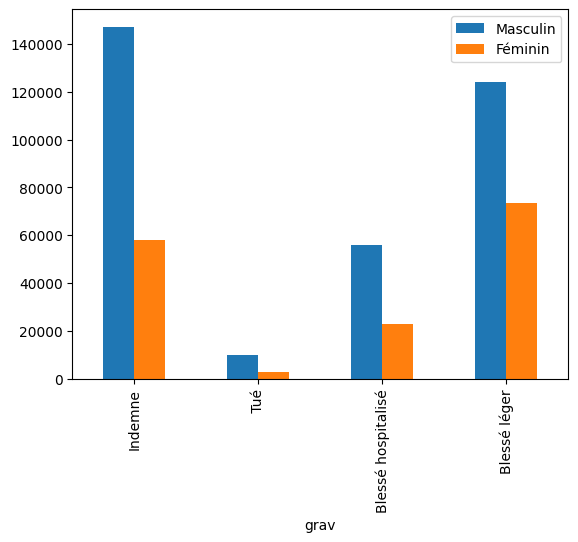

In [ ]:
# grav : 1 Indemne / 2 Tué/ 3 Blessé hospitalisé /4 – Blessé léger 
# sexe : 1 masculin / 2 Féminin

lab = ['Indemne', ' Tué', 'Blessé hospitalisé', 'Blessé léger']
lab2= ["Masculin", "Féminin"]

ax1 = pd.crosstab(df_usagers['grav'],df_usagers['sexe']).plot.bar()
ax1.set_xticklabels(lab)
plt.legend(lab2)


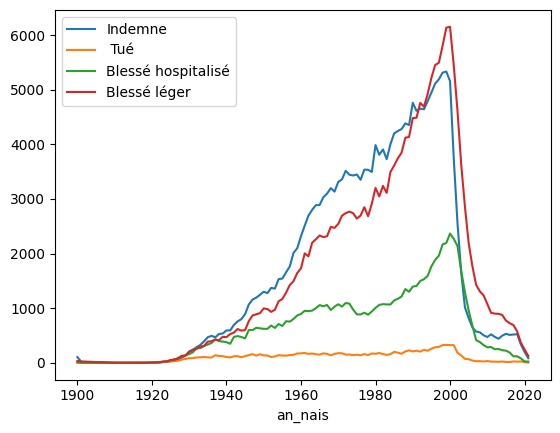

In [ ]:


pd.crosstab(df_usagers['an_nais'],df_usagers['grav']).plot()
lab2= ["Masculin", "Féminin"]
plt.legend(lab)


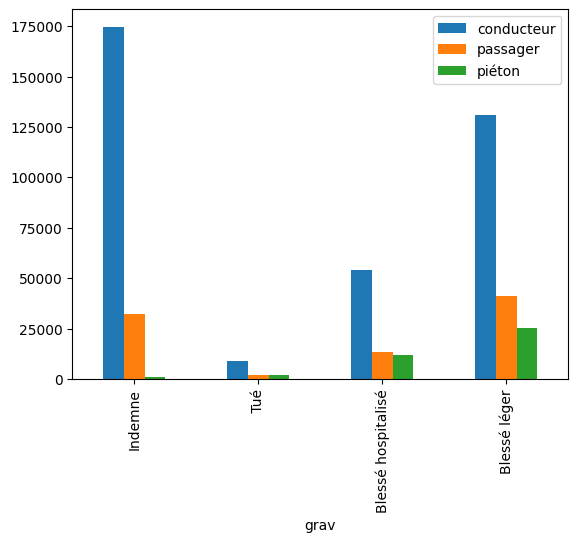

In [ ]:
lab = ['Indemne', ' Tué', 'Blessé hospitalisé', 'Blessé léger']
lab2= ["conducteur", "passager", "piéton"]

ax1 = pd.crosstab(df_usagers['grav'],df_usagers['catu']).plot.bar()
ax1.set_xticklabels(lab)
plt.legend(lab2)


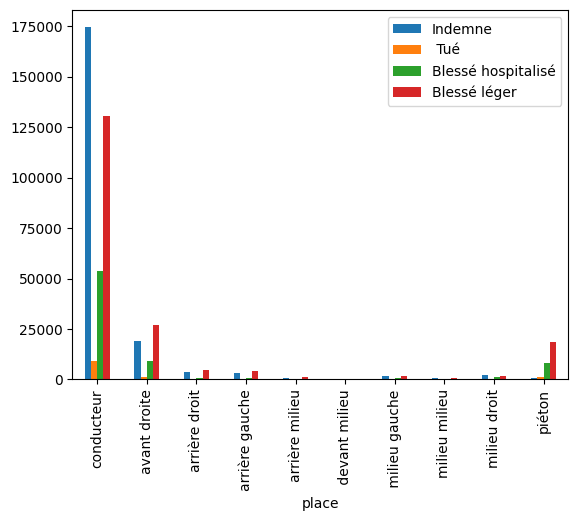

In [ ]:

lab = ['Indemne', ' Tué', 'Blessé hospitalisé', 'Blessé léger']
lab2= ["conducteur", "avant droite", "arrière droit",  'arrière gauche', 'arrière milieu',' devant milieu',' milieu gauche', 'milieu milieu', 'milieu droit','piéton']

ax1 = pd.crosstab(df_usagers['place'],df_usagers['grav']).plot.bar()
ax1.set_xticklabels(lab2)
plt.legend(lab)


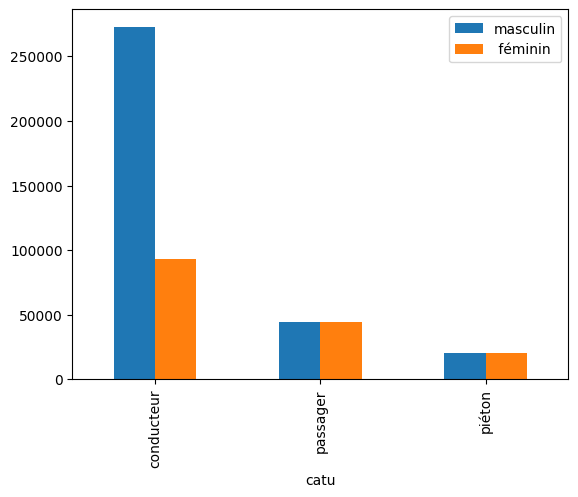

In [ ]:
# sexe : 1 masculin / 2 Féminin
# catu : 1 conducteur / 2 passager / 3 piéton

lab = ['masculin', ' féminin']
lab2= ["conducteur", "passager", "piéton"]

ax1 = pd.crosstab(df_usagers['catu'],df_usagers['sexe']).plot.bar()
ax1.set_xticklabels(lab2)
plt.legend(lab)

[Text(0, 0, 'Aucun équipement'),
 Text(1, 0, ' Ceinture'),
 Text(2, 0, 'Casque'),
 Text(3, 0, 'Dispo enfants'),
 Text(4, 0, 'Gilet refléchissant'),
 Text(5, 0, 'Airbag'),
 Text(6, 0, 'Gants'),
 Text(7, 0, 'Gants+airbags'),
 Text(8, 0, 'Non séterminable'),
 Text(9, 0, 'Autre')]

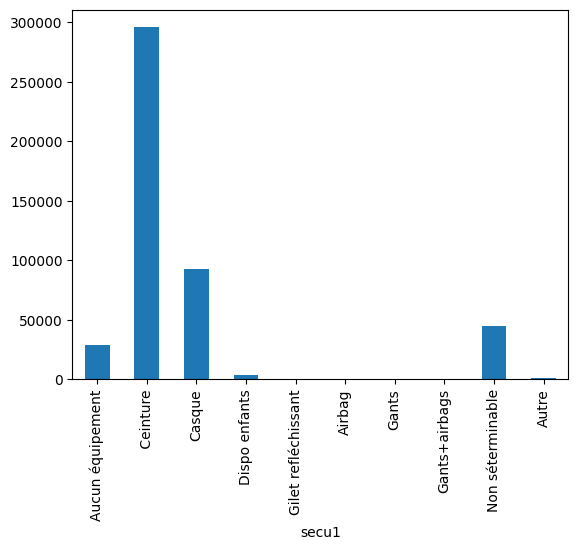

In [ ]:

lab = ['Aucun équipement', ' Ceinture', 'Casque', "Dispo enfants", 'Gilet refléchissant', 'Airbag', 'Gants', 'Gants+airbags', 'Non séterminable', 'Autre']
ax1 =df_usagers.groupby('secu1').size().plot.bar()
ax1.set_xticklabels(lab)


[Text(0, 0, 'Aucun équipement'),
 Text(1, 0, ' Ceinture'),
 Text(2, 0, 'Casque'),
 Text(3, 0, 'Dispo enfants'),
 Text(4, 0, 'Gilet refléchissant'),
 Text(5, 0, 'Airbag'),
 Text(6, 0, 'Gants'),
 Text(7, 0, 'Gants+airbags'),
 Text(8, 0, 'Non séterminable'),
 Text(9, 0, 'Autre')]

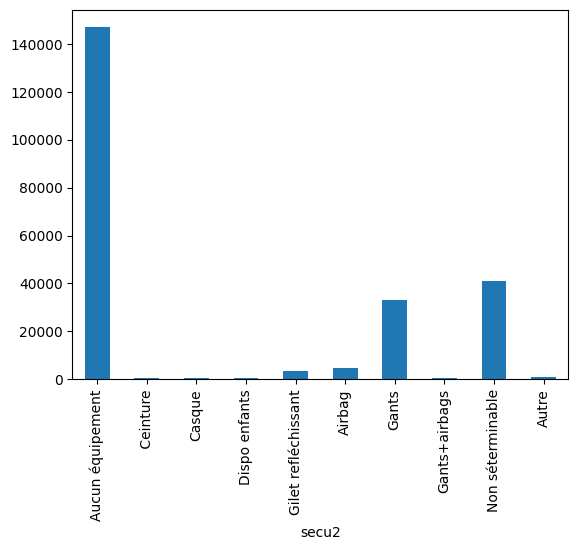

In [ ]:

lab = ['Aucun équipement', ' Ceinture', 'Casque', "Dispo enfants", 'Gilet refléchissant', 'Airbag', 'Gants', 'Gants+airbags', 'Non séterminable', 'Autre']
ax1 =df_usagers.groupby('secu2').size().plot.bar()
ax1.set_xticklabels(lab)


[Text(0, 0, 'Aucun équipement'),
 Text(1, 0, ' Ceinture'),
 Text(2, 0, 'Casque'),
 Text(3, 0, 'Dispo enfants'),
 Text(4, 0, 'Gilet refléchissant'),
 Text(5, 0, 'Airbag'),
 Text(6, 0, 'Gants'),
 Text(7, 0, 'Gants+airbags'),
 Text(8, 0, 'Non séterminable'),
 Text(9, 0, 'Autre')]

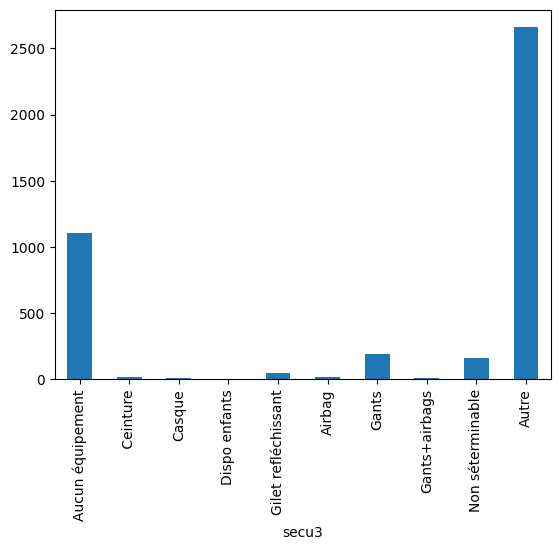

In [ ]:
lab = ['Aucun équipement', ' Ceinture', 'Casque', "Dispo enfants", 'Gilet refléchissant', 'Airbag', 'Gants', 'Gants+airbags', 'Non séterminable', 'Autre']
ax1 =df_usagers.groupby('secu3').size().plot.bar()
ax1.set_xticklabels(lab)
